In [11]:
import os
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eng20\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eng20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eng20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 1. Load Data from Folders
def load_data(directory):
    data = []
    for label in ['pos', 'neg']:
        folder_path = os.path.join(directory, label)
        sentiment = 1 if label == 'pos' else 0
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                review = f.read()
                data.append({'review': review, 'sentiment': sentiment})
    return pd.DataFrame(data)

data_dir = "txt_sentoken"  # Replace with your directory path
df = load_data(data_dir)


In [14]:

# 2. Text Cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatization
    return ' '.join(text)

df['cleaned_review'] = df['review'].apply(clean_text)


In [17]:
df['cleaned_review'].head()


0    film adapted comic book plenty success whether...
1    every movie come along suspect studio every in...
2    got mail work alot better deserves order make ...
3    jaw rare film grab attention show single image...
4    moviemaking lot like general manager nfl team ...
Name: cleaned_review, dtype: object

In [18]:
df['sentiment'].value_counts()

sentiment
1    1000
0    1000
Name: count, dtype: int64

In [19]:

# 3. Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)  # Use CountVectorizer for BoW
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']


In [22]:

show = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
show.head()

,abandon,abandoned,ability,able,aboard,abraham,absence,absent,absolute,absolutely,...,younger,youngster,youth,zane,zany,zellweger,zero,zeta,zombie,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.061579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.035166,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


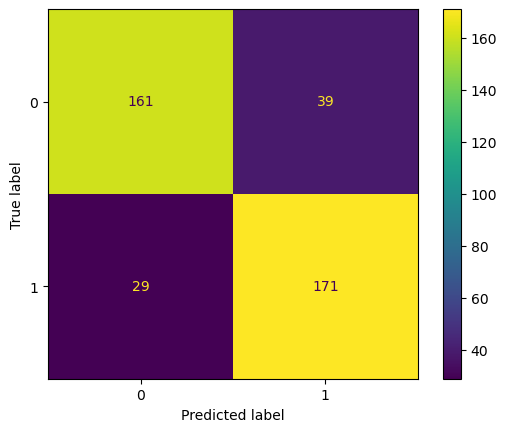

In [23]:

# 4. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Model Evaluation
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [24]:

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       200
           1       0.81      0.85      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

